In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [2]:
google_url = 'https://docs.google.com/spreadsheets/d/1Rmw4nLN7cxRnhFFrIETh3gx8Gxcv56hV/edit#gid=548315443'
new_google_url = google_url.replace('edit#gid', 'export?format=csv&gid')
df=pd.read_csv(new_google_url)
df.head()

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...


In [3]:
# процентный список пропущенных значений
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id_ответа - 0%
Раса - 0%
Пол - 0%
Возраст - 0%
Статус курения - 0%
ECOG - 0%
Есть опухолевая нагрузка? (симптомная опухоль) - 0%
Ко-мутации KRAS - 0%
Ко-мутации p53. - 0%
Ко-мутации STK11 - 0%
Ко-мутации KEAP1 - 0%
Срок от окончания ХЛТ - 0%
Молекулярный статус (только для неплоскоклеточного рака) - 0%
PD-L1 статус - 0%
Предпочтение пациента по ответу на терапию - 0%
Ответ эксперта (Лактионов) - 0%
Поставьте галочку, если уверены на 100% - 0%
Если 75% - 0%
Если 50% - 0%
Альтернатива, если 50% - обязательно - 0%
Комментарий - 0%


In [4]:
# информация о колонках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   id_ответа                                                 248832 non-null  int64 
 1   Раса                                                      248832 non-null  object
 2   Пол                                                       248832 non-null  object
 3   Возраст                                                   248832 non-null  object
 4   Статус курения                                            248832 non-null  object
 5   ECOG                                                      248832 non-null  object
 6   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 7   Ко-мутации KRAS                                           248832 non-null  object
 8   Ко-мутации p53

In [7]:
# Делаем замены данных object на уникальные int64
df['Раса'] = df['Раса'].replace({'Азиатская': 0, 'Европейская': 1, 'Другая': 2})
df['Пол'] = df['Пол'].replace({' Мужской': 0, ' Женский': 1})
df['Возраст'] = df['Возраст'].replace({' До 70': 0, ' >70': 1})
df['Статус курения'] = df['Статус курения'].replace({' В настоящее время': 0, ' Курение в прошлом (бросил более 1 года)': 1, ' Курение в прошлом (бросил более 1 месяца до 1 года)': 2})
df['ECOG'] = df['ECOG'].replace({' 0-1': 0, '2': 1})
df['Есть опухолевая нагрузка? (симптомная опухоль)'] = df['Есть опухолевая нагрузка? (симптомная опухоль)'].replace({' да': '1', ' нет': '0'})
df['Ко-мутации KRAS'] = df['Ко-мутации KRAS'].replace({' да': '1', ' нет': '0'})
df['Ко-мутации p53.'] = df['Ко-мутации p53.'].replace({' да': '1', ' нет': '0'})
df['Ко-мутации STK11'] = df['Ко-мутации STK11'].replace({' да': '1', ' нет': '0'})
df['Ко-мутации KEAP1'] = df['Ко-мутации KEAP1'].replace({' да': '1', ' нет': '0'})
df['Срок от окончания ХЛТ'] = df['Срок от окончания ХЛТ'].replace({'до 42 дней': 0, 'от 43 до 60 дней': 1, 'более 61 дня': 2})
df['Молекулярный статус (только для неплоскоклеточного рака)'] = df['Молекулярный статус (только для неплоскоклеточного рака)'].replace({' ALK позитивный': 0, ' EGFR ex19': 1, ' EGFR ex21': 2})
df['Молекулярный статус (только для неплоскоклеточного рака)'] = df['Молекулярный статус (только для неплоскоклеточного рака)'].replace({' EGFR редкий вариант': 3, ' не исследовались': 4, ' нет мутаций': 5})
df['PD-L1 статус'] = df['PD-L1 статус'].replace({' Более 1%': 0, ' Менее 1%': 1, ' Не исследовался': 2})
df['Предпочтение пациента по ответу на терапию'] = df['Предпочтение пациента по ответу на терапию'].replace({' Результативность лечения': 0, ' сохранение качества жизни': 1})
df['Ответ эксперта (Лактионов)'] = df['Ответ эксперта (Лактионов)'].replace({'Алектиниб': 0, 'Дурвалумаб': 1, 'Наблюдение': 2, 'Осимертиниб': 3})

In [8]:
df.head(10)

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,0,0,0,0,0,1,1,1,1,...,0,5,2,0,1,True,False,False,0,0
1,2,0,0,0,0,0,1,1,1,1,...,1,5,2,0,1,True,False,False,0,0
2,3,0,0,0,0,0,1,1,1,1,...,2,5,2,0,2,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,0,0,0,0,0,1,1,1,1,...,0,4,2,0,1,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,0,0,0,0,0,1,1,1,1,...,1,4,2,0,1,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
5,6,0,0,0,0,0,1,1,1,1,...,2,4,2,0,2,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
6,7,0,0,0,0,0,1,1,1,1,...,0,3,2,0,2,True,False,False,0,"Возможна низкая эффективность Дурвалумаба, Оси..."
7,8,0,0,0,0,0,1,1,1,1,...,1,3,2,0,2,True,False,False,0,"Возможна низкая эффективность Дурвалумаба, Оси..."
8,9,0,0,0,0,0,1,1,1,1,...,2,3,2,0,2,True,False,False,0,0
9,10,0,0,0,0,0,1,1,1,1,...,0,1,2,0,3,False,True,False,Наблюдение,"Возможна низкая эффективность Дурвалумаба, Оси..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   id_ответа                                                 248832 non-null  int64 
 1   Раса                                                      248832 non-null  int64 
 2   Пол                                                       248832 non-null  int64 
 3   Возраст                                                   248832 non-null  int64 
 4   Статус курения                                            248832 non-null  int64 
 5   ECOG                                                      248832 non-null  int64 
 6   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 7   Ко-мутации KRAS                                           248832 non-null  object
 8   Ко-мутации p53

<ipython-input-10-f6b3e497a314>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cor.corr(), annot=True, linewidths=1, cbar=True)


<Axes: >

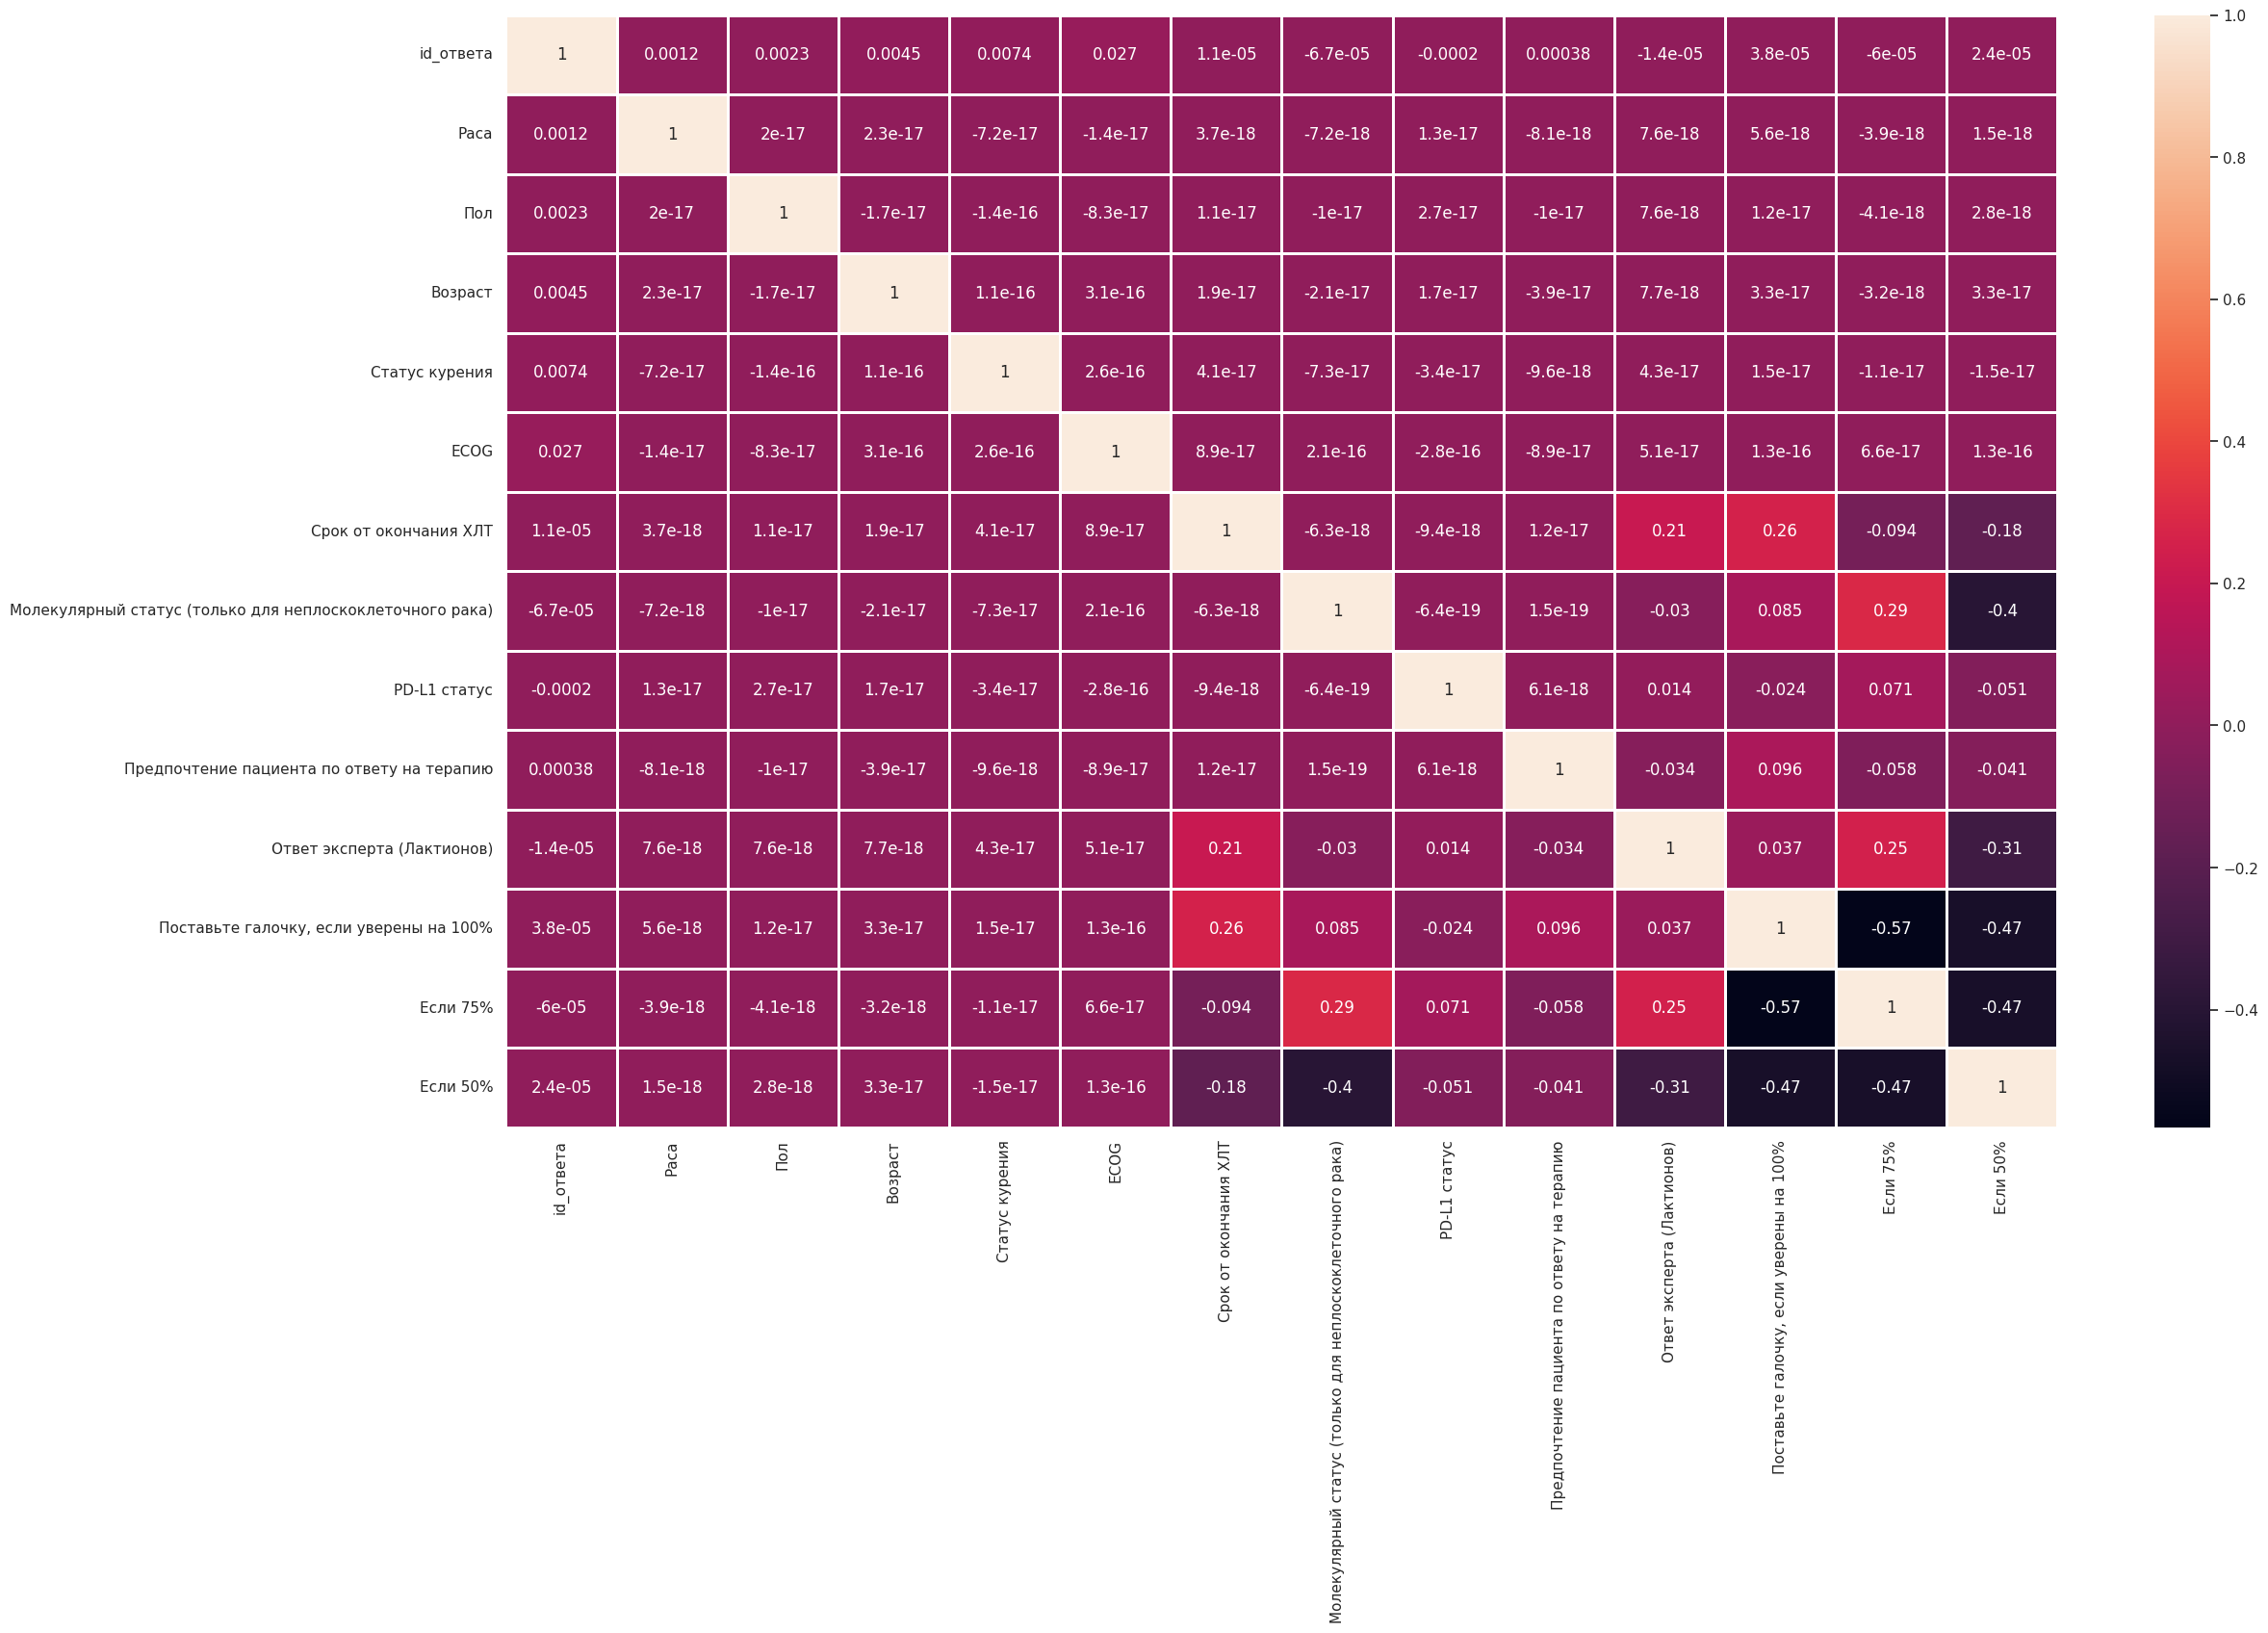

In [10]:
# построим тепловую карту
df_cor = df
# задаем размер тепловой карты
sns.set(rc = {'figure.figsize':(26,15)})
# добавляем надписи по осям X, Y, регулируем отступы между ячейками, выносим шкалу справа
sns.heatmap(df_cor.corr(), annot=True, linewidths=1, cbar=True)

In [13]:
# удаляем ненужные колонки
df_to_regressor_100 = df.drop(columns=['Если 75%', 'Если 50%', 'Альтернатива, если 50% - обязательно', 'Комментарий', 'id_ответа'])
df_to_regressor_100

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%"
0,0,0,0,0,0,1,1,1,1,1,0,5,2,0,1,True
1,0,0,0,0,0,1,1,1,1,1,1,5,2,0,1,True
2,0,0,0,0,0,1,1,1,1,1,2,5,2,0,2,False
3,0,0,0,0,0,1,1,1,1,1,0,4,2,0,1,False
4,0,0,0,0,0,1,1,1,1,1,1,4,2,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,2,1,1,1,1,0,0,0,0,0,1,2,0,1,2,False
248828,2,1,1,1,1,0,0,0,0,0,2,2,0,1,2,True
248829,2,1,1,1,1,0,0,0,0,0,0,0,0,1,0,False
248830,2,1,1,1,1,0,0,0,0,0,1,0,0,1,0,False


In [15]:
df_to_regressor_100.count()

Раса                                                        248832
Пол                                                         248832
Возраст                                                     248832
Статус курения                                              248832
ECOG                                                        248832
Есть опухолевая нагрузка? (симптомная опухоль)              248832
Ко-мутации KRAS                                             248832
Ко-мутации p53.                                             248832
Ко-мутации STK11                                            248832
Ко-мутации KEAP1                                            248832
Срок от окончания ХЛТ                                       248832
Молекулярный статус (только для неплоскоклеточного рака)    248832
PD-L1 статус                                                248832
Предпочтение пациента по ответу на терапию                  248832
Ответ эксперта (Лактионов)                                  24

In [17]:
# Построение вектора важности признаков из рандомизированного леса принятия решений.
# В качестве функции стоимости здесь лучше подходит MSE
X=df_to_regressor_100.iloc[:, 0:13]
Y=df_to_regressor_100.iloc[:, 14:15]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

<ipython-input-17-002f4d26f932>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, Y)


RandomForestRegressor(max_depth=20, random_state=0)

<Figure size 1200x1200 with 0 Axes>

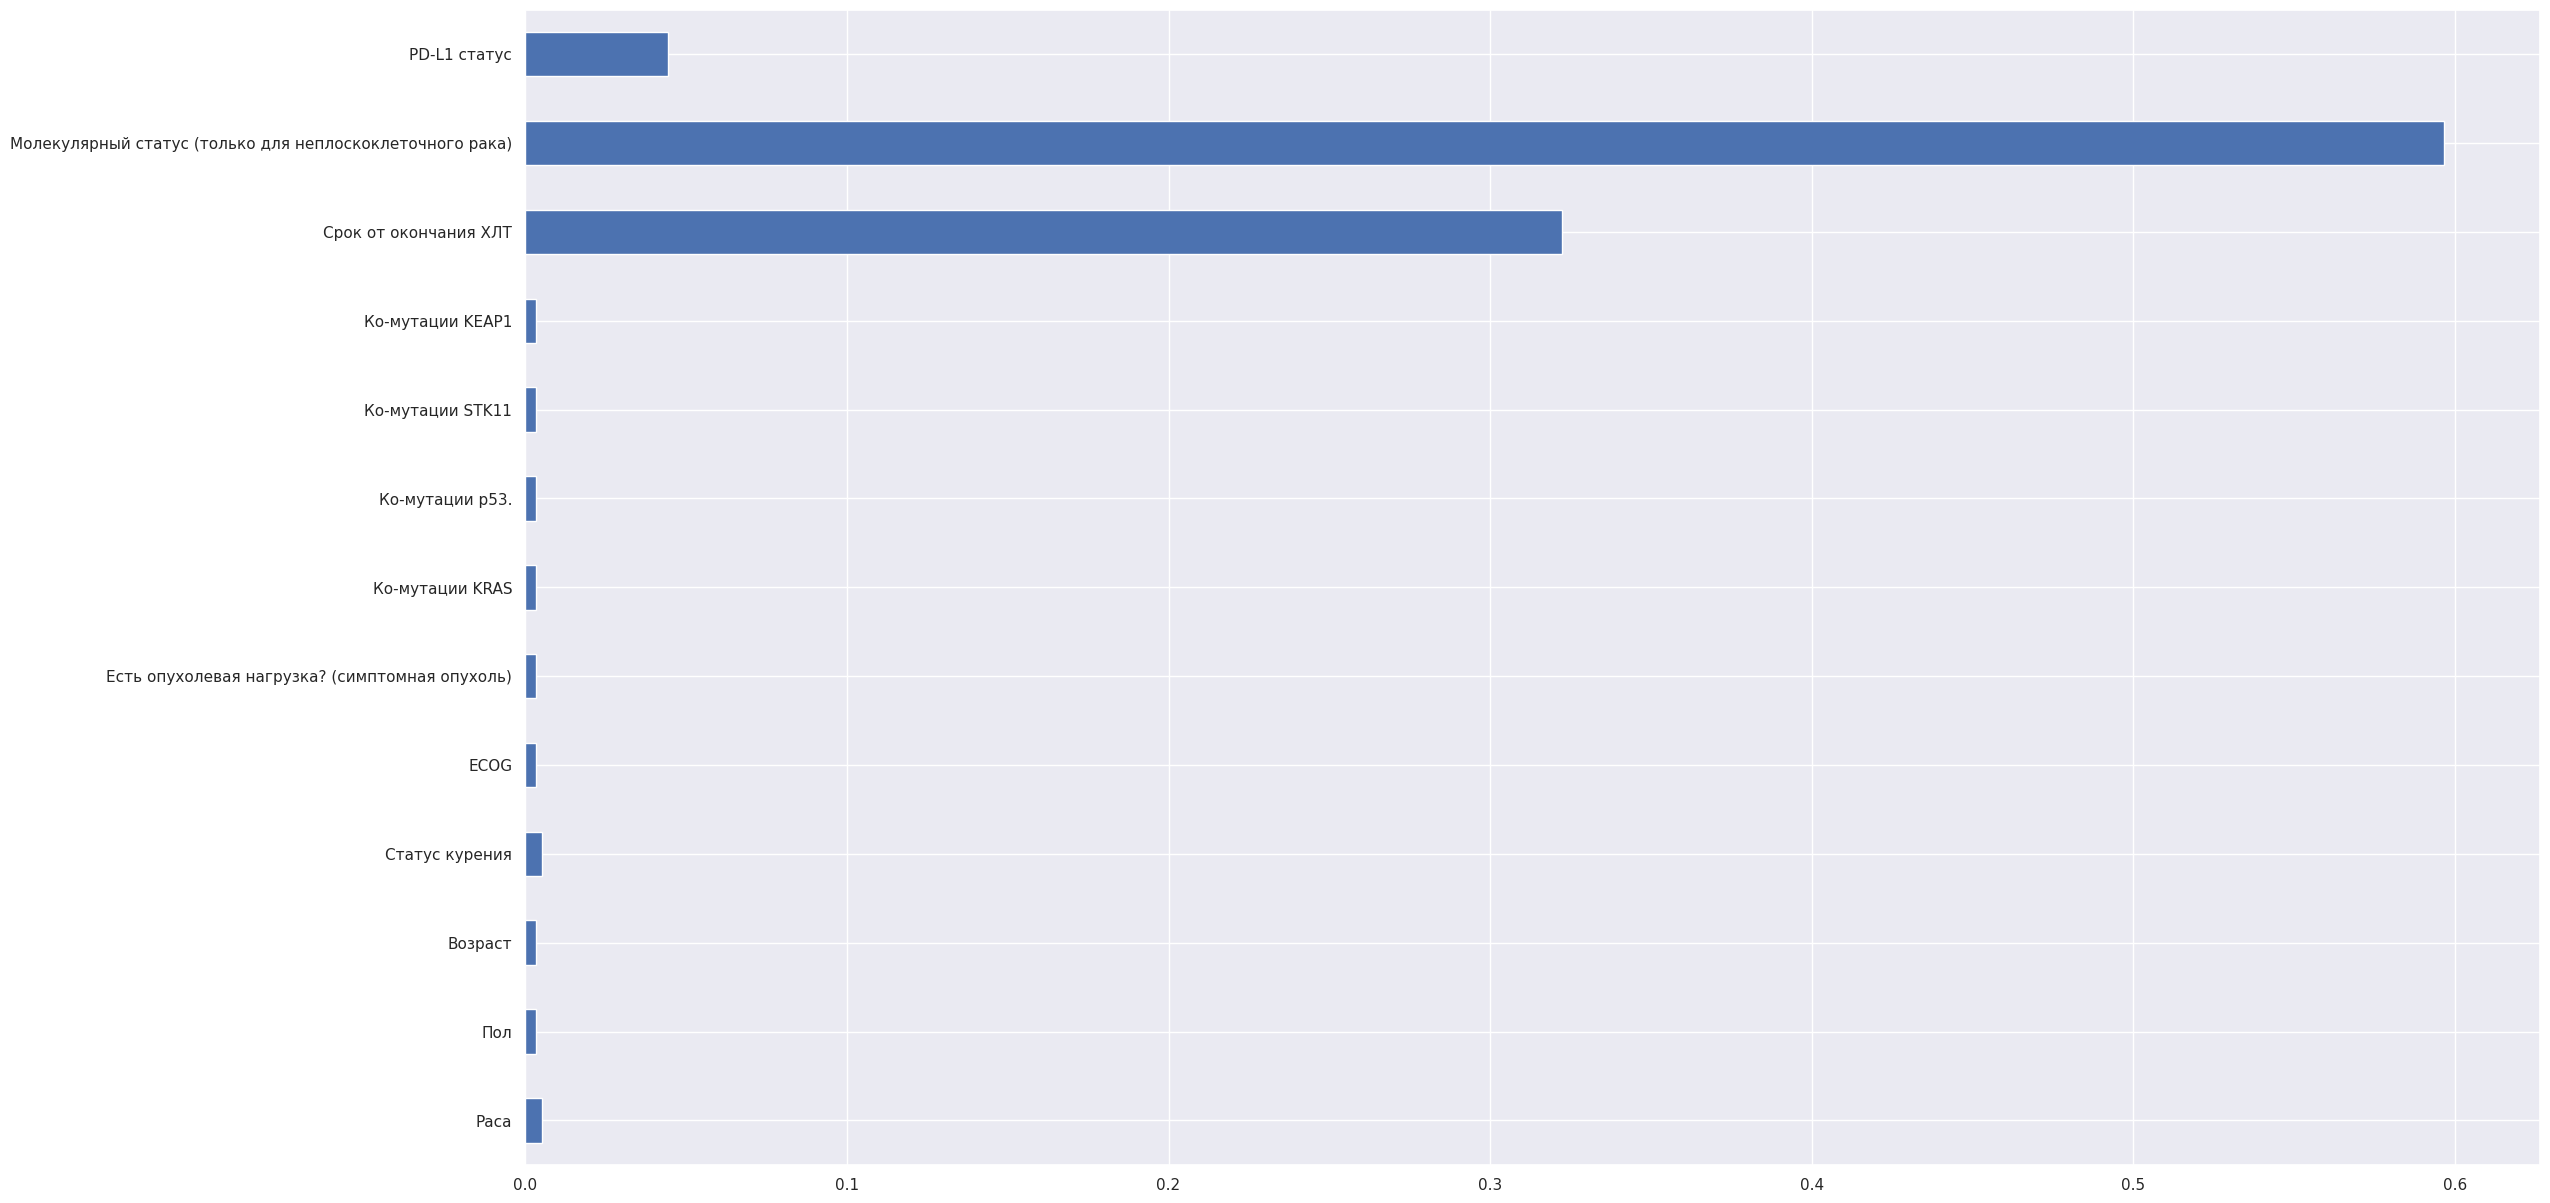

<Figure size 1200x1200 with 0 Axes>

In [18]:
# гистрограмма важности признаков
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.figure(figsize=(12,12))

**Больше всего влияние на 100% уверенность в рекомендации влияют (нужно доработать признаки Ко-мутации, они почему-то не хотят уходить из object):**
*   Молекулярный статус
*   Срок от окончания ХЛТ
*   PD-L1 статус

In [19]:
# удаляем ненужные колонки
df_to_regressor_75 = df.drop(columns=['Поставьте галочку, если уверены на 100%', 'Если 50%', 'Альтернатива, если 50% - обязательно', 'Комментарий', 'id_ответа'])
df_to_regressor_75

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),Если 75%
0,0,0,0,0,0,1,1,1,1,1,0,5,2,0,1,False
1,0,0,0,0,0,1,1,1,1,1,1,5,2,0,1,False
2,0,0,0,0,0,1,1,1,1,1,2,5,2,0,2,True
3,0,0,0,0,0,1,1,1,1,1,0,4,2,0,1,True
4,0,0,0,0,0,1,1,1,1,1,1,4,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,2,1,1,1,1,0,0,0,0,0,1,2,0,1,2,False
248828,2,1,1,1,1,0,0,0,0,0,2,2,0,1,2,False
248829,2,1,1,1,1,0,0,0,0,0,0,0,0,1,0,False
248830,2,1,1,1,1,0,0,0,0,0,1,0,0,1,0,False


In [20]:
# Построение вектора важности признаков из рандомизированного леса принятия решений.
# В качестве функции стоимости здесь лучше подходит MSE
X=df_to_regressor_75.iloc[:, 0:13]
Y=df_to_regressor_75.iloc[:, 14:15]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

<ipython-input-20-aceb4ee9102a>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, Y)


RandomForestRegressor(max_depth=20, random_state=0)

<Figure size 1200x1200 with 0 Axes>

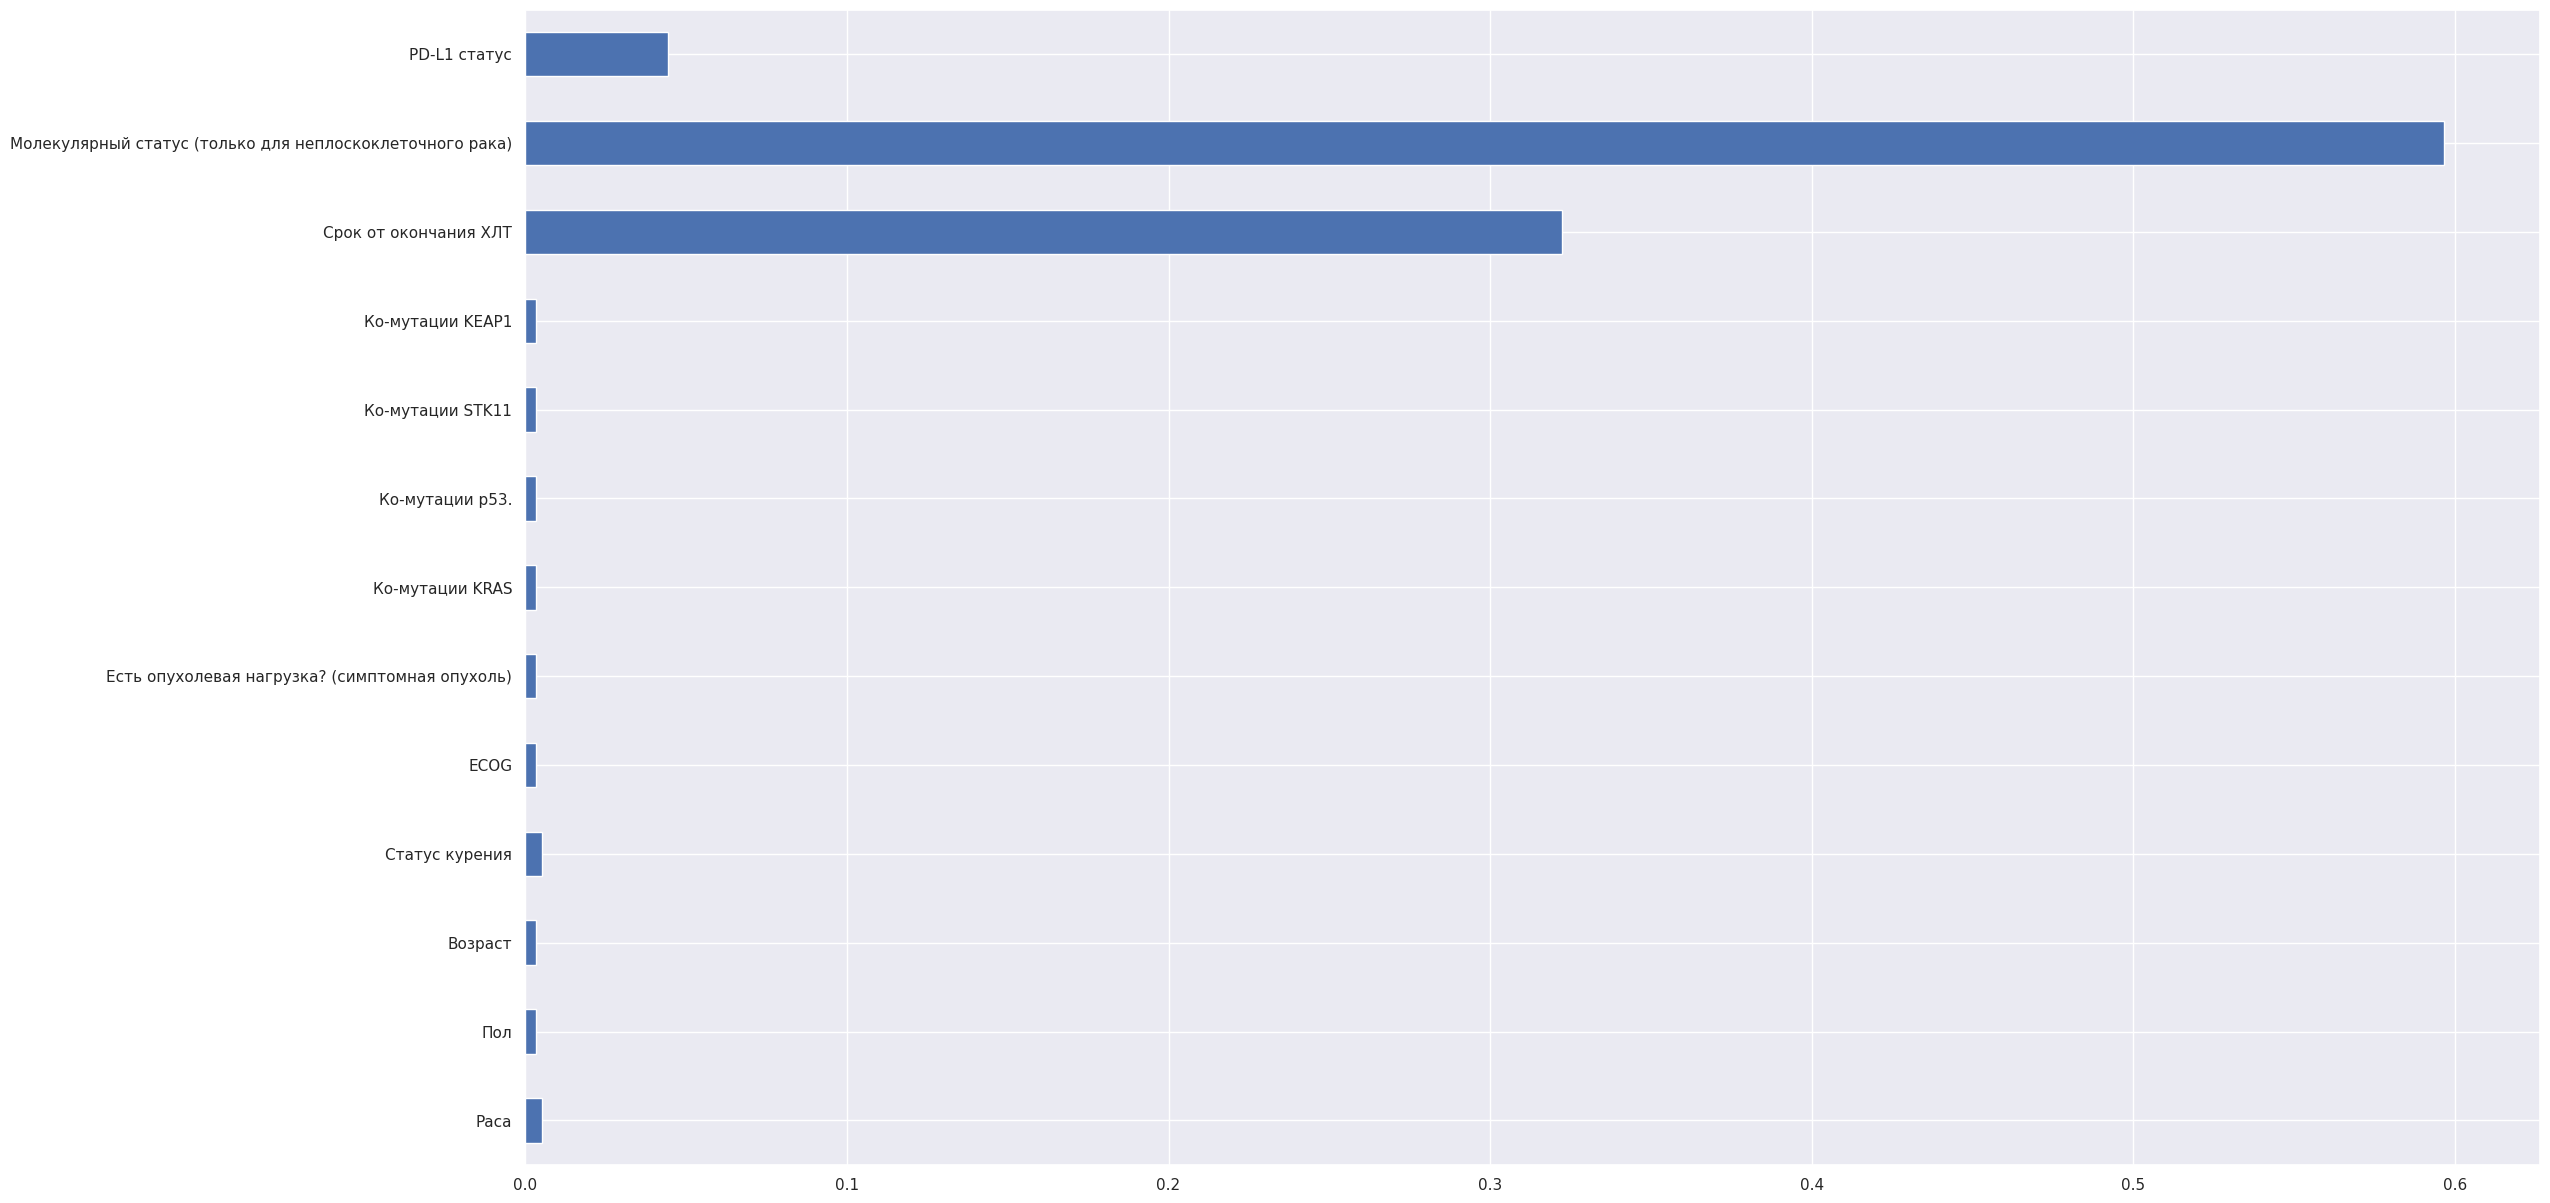

<Figure size 1200x1200 with 0 Axes>

In [21]:
# гистрограмма важности признаков
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.figure(figsize=(12,12))

In [22]:
# удаляем ненужные колонки
df_to_regressor_50 = df.drop(columns=['Поставьте галочку, если уверены на 100%', 'Если 75%', 'Альтернатива, если 50% - обязательно', 'Комментарий', 'id_ответа'])
df_to_regressor_50

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),Если 50%
0,0,0,0,0,0,1,1,1,1,1,0,5,2,0,1,False
1,0,0,0,0,0,1,1,1,1,1,1,5,2,0,1,False
2,0,0,0,0,0,1,1,1,1,1,2,5,2,0,2,False
3,0,0,0,0,0,1,1,1,1,1,0,4,2,0,1,False
4,0,0,0,0,0,1,1,1,1,1,1,4,2,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,2,1,1,1,1,0,0,0,0,0,1,2,0,1,2,True
248828,2,1,1,1,1,0,0,0,0,0,2,2,0,1,2,False
248829,2,1,1,1,1,0,0,0,0,0,0,0,0,1,0,True
248830,2,1,1,1,1,0,0,0,0,0,1,0,0,1,0,True


In [24]:
# Построение вектора важности признаков из рандомизированного леса принятия решений.
# В качестве функции стоимости здесь лучше подходит MSE
X=df_to_regressor_50.iloc[:, 0:13]
Y=df_to_regressor_50.iloc[:, 14:15]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

<ipython-input-24-b78849cf7ffd>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, Y)


RandomForestRegressor(max_depth=20, random_state=0)

<Figure size 1200x1200 with 0 Axes>

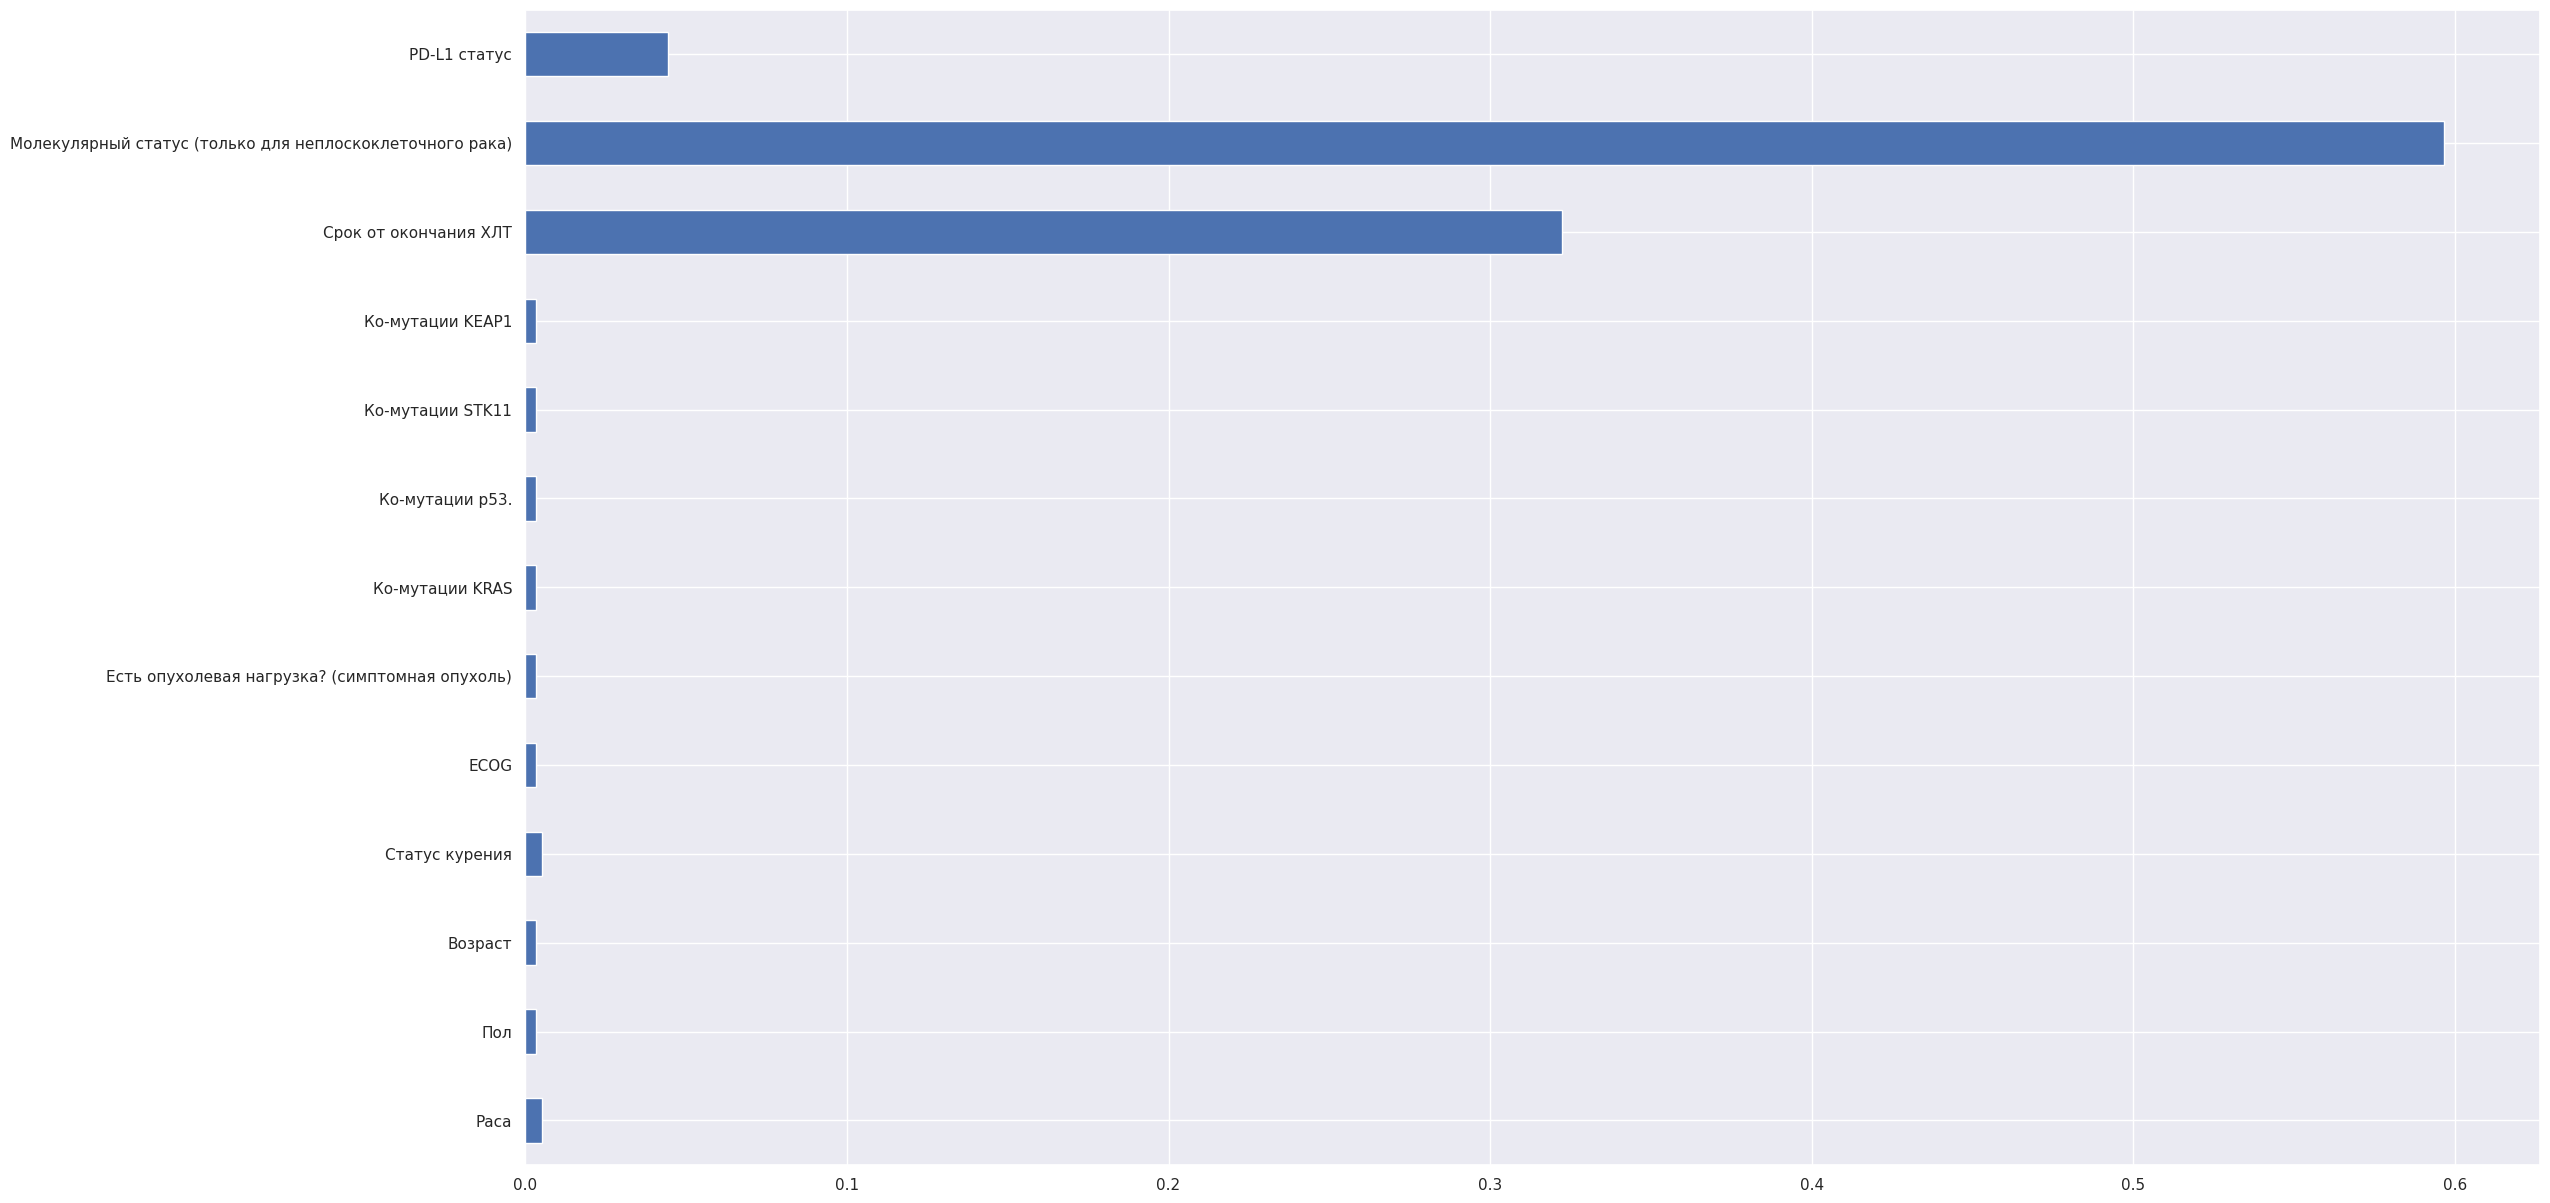

<Figure size 1200x1200 with 0 Axes>

In [25]:
# гистрограмма важности признаков
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.figure(figsize=(12,12))